In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [5]:
model_name = "Qwen2-72B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [6]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   text                                                           3000 non-null   object
 1   label                                                          3000 non-null   object
 2   title                                                          3000 non-null   object
 3   puzzle                                                         3000 non-null   object
 4   truth                                                          3000 non-null   object
 5   Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf                 3000 non-null   object
 6   Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf   3000 non-null   object
 7   Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf   3000 n

In [7]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf',
 'Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf']

In [8]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:343: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                                              model  accuracy  \
0    0.0     Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf  0.747333   
1    0.2  Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bf...  0.758333   
2    0.4  Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bf...  0.736667   
3    0.6  Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.b...  0.757000   
4    0.8  Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.b...  0.789333   
5    1.0  Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.b...  0.737667   
6    1.2  Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.b...  0.763000   

   precision    recall        f1  
0   0.804122  0.747333  0.760783  
1   0.819993  0.758333  0.782751  
2   0.822487  0.736667  0.770063  
3   0.825382  0.757000  0.784000  
4   0.822910  0.789333  0.803312  
5   0.824365  0.737667  0.769962  
6   0.831888  0.763000  0.790108

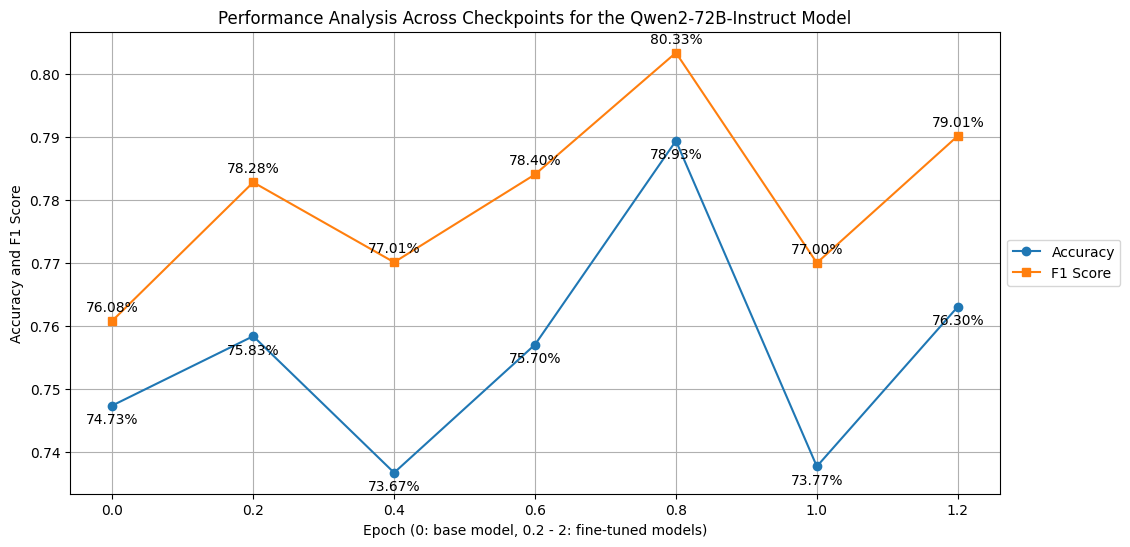

In [9]:
plot_metrics(perf_df, model_name)

In [10]:
perf_df.to_csv(metrics_csv, index=False)

********** Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf
不是                                   1775
是                                     852
问法错误                                  140
不重要                                   122
回答正确                                   43
                                     ... 
不是\n\n破旧的帽子属于哭泣人的爷爷。                    1
不是\n\n请参与者提出完整的问题，以便我能更准确地回答。当前         1
是小男孩放的。                                 1
不是\n\n根据谜底，爷爷去年夏天已经因病去世，所以现在            1
不是\n\n（说明：参与者的问题实际上是在询问帽子的材质或者类型，       1
Name: count, Length: 69, dtype: int64


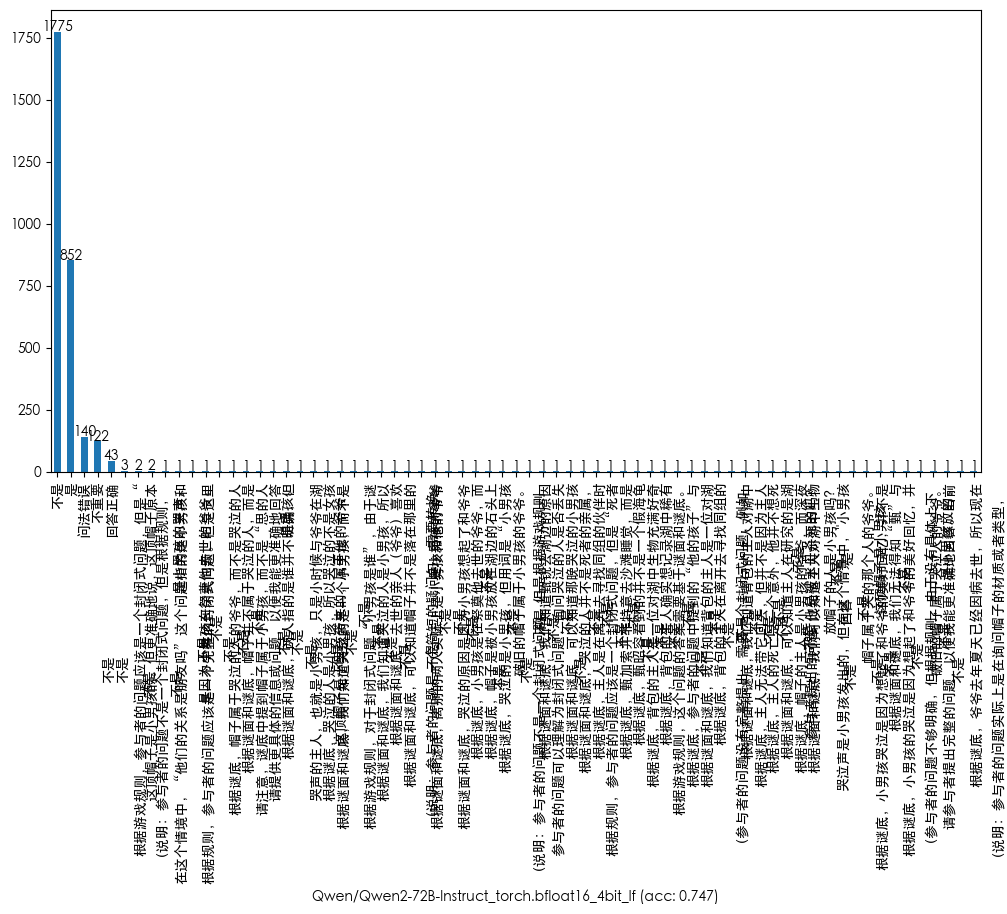

********** Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf
不是      1412
是       1102
不重要      417
问法错误      39
回答正确      30
Name: count, dtype: int64


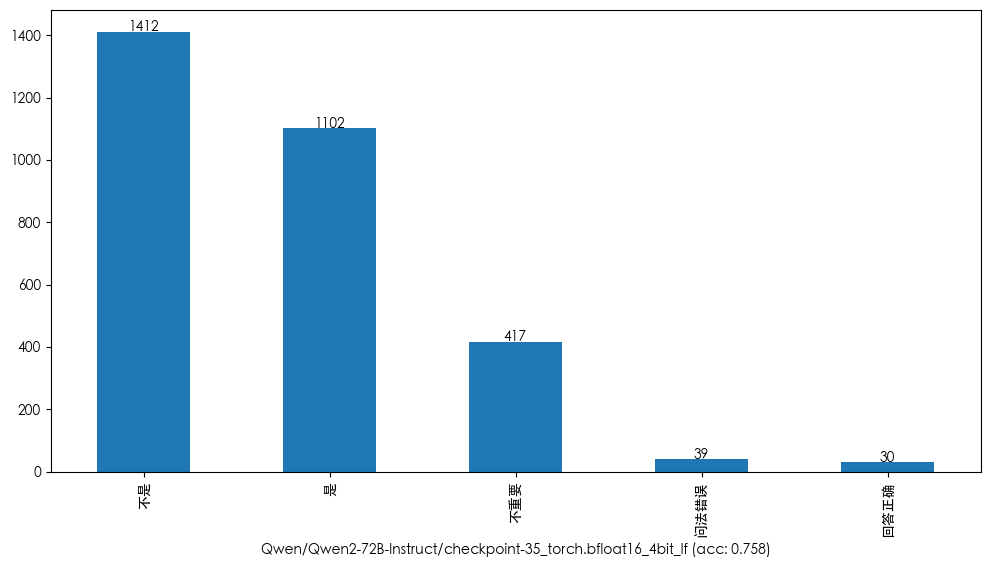

********** Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf
不是      1340
是       1074
不重要      496
问法错误      59
回答正确      31
Name: count, dtype: int64


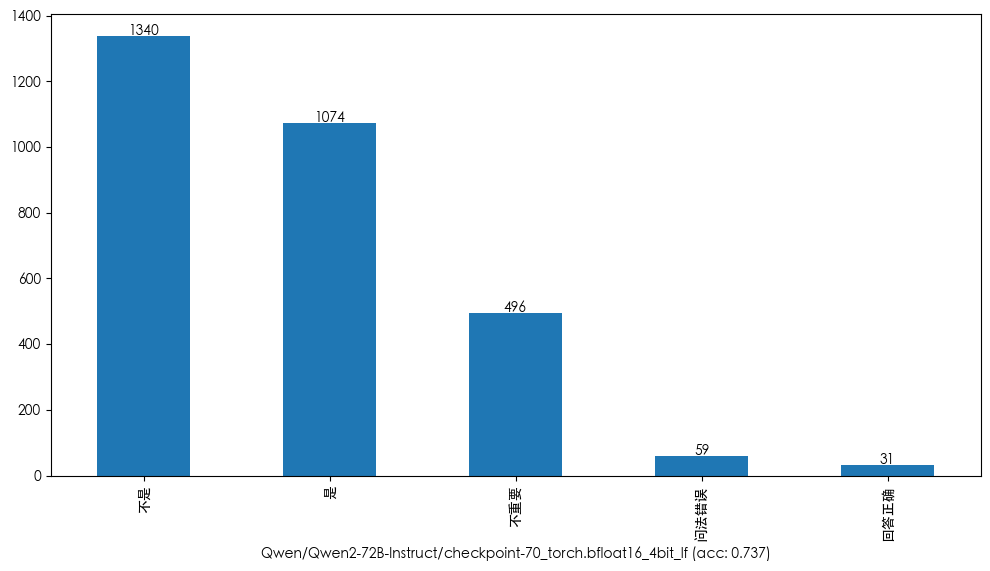

********** Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf
不是      1355
是       1129
不重要      412
问法错误      77
回答正确      27
Name: count, dtype: int64


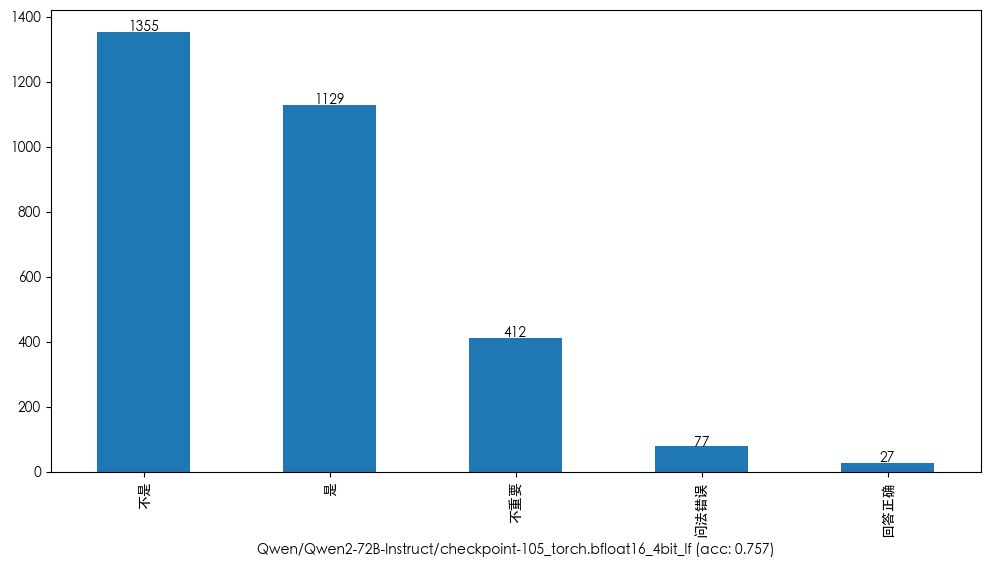

********** Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf
不是      1439
是       1181
不重要      285
问法错误      62
回答正确      33
Name: count, dtype: int64


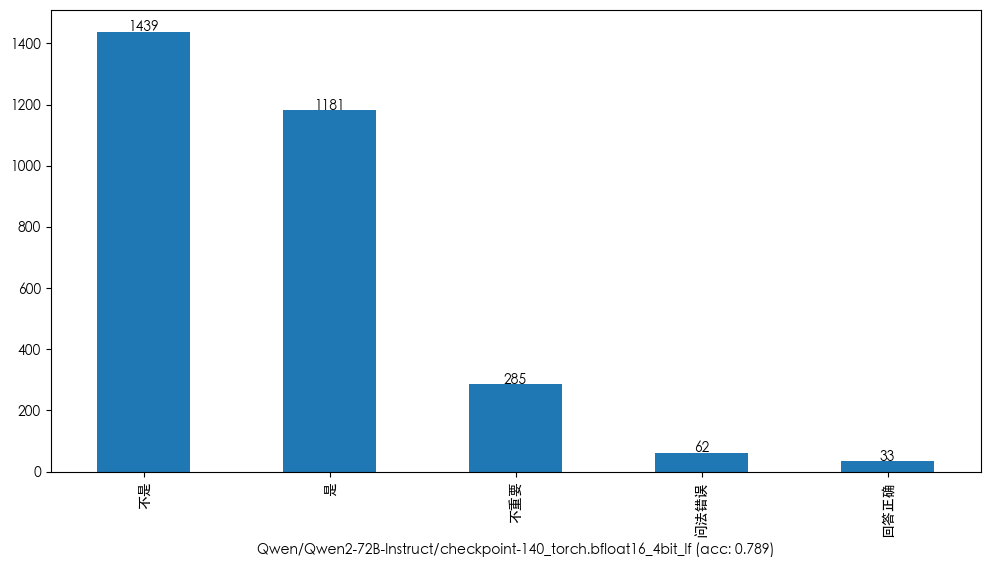

********** Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf
不是      1245
是       1155
不重要      504
问法错误      63
回答正确      33
Name: count, dtype: int64


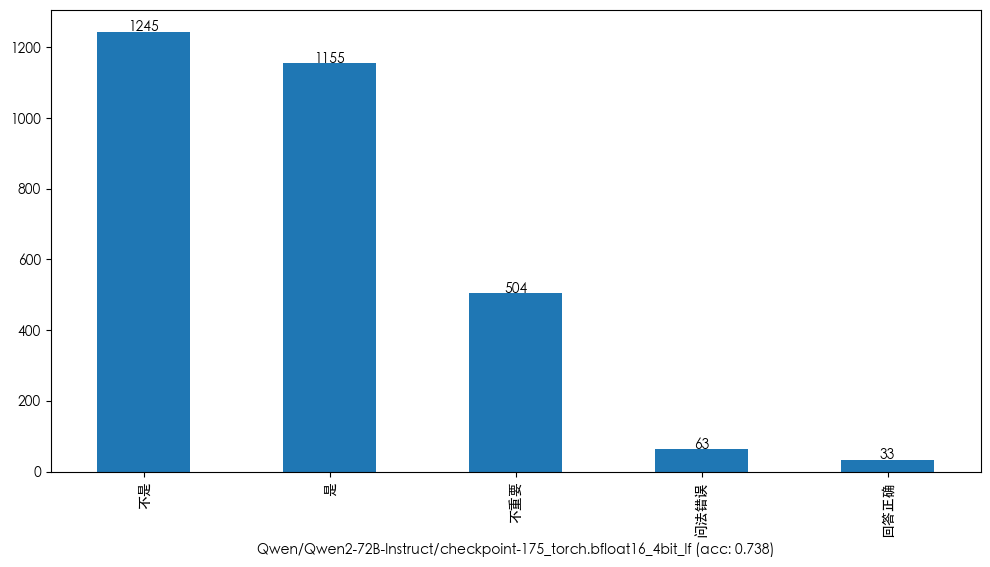

********** Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf
不是      1329
是       1144
不重要      413
问法错误      76
回答正确      38
Name: count, dtype: int64


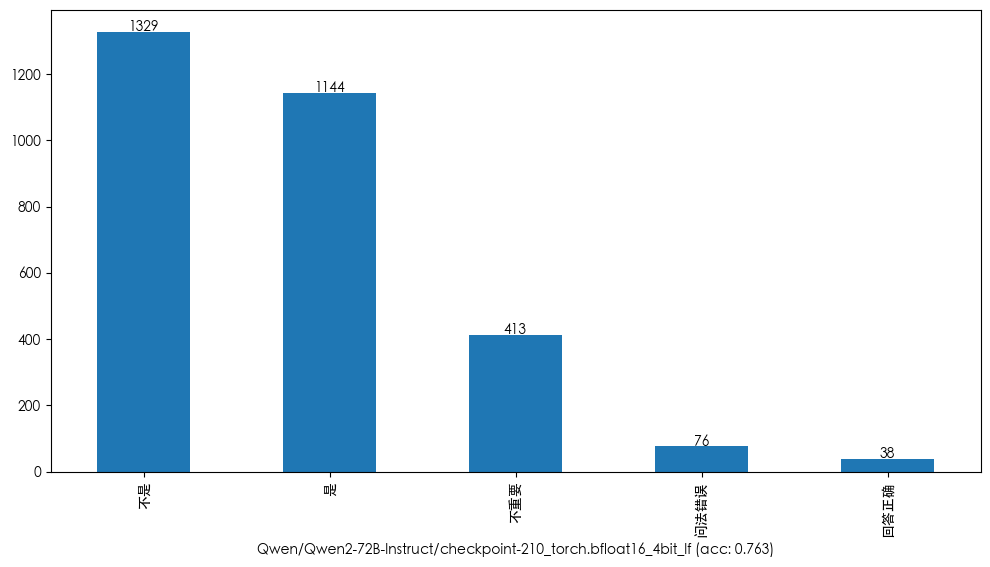

In [11]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, f"{col} (acc: {accuracy:.3f})")